In [1]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt

# filter FutureWarnings from pandas, otherwise notebook gets crowded
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
# helperfunctions
def parse_clstr_file(filename):
    """
    Parses a .clstr file and returns the mean cluster size and the number of clusters.
    """
    with open(filename, 'r') as f:
        clusters = {}
        current_cluster = ""
        for line in f:
            if line.startswith('>Cluster'):
                current_cluster = line.strip()
                clusters[current_cluster] = 0
            else:
                clusters[current_cluster] += 1

    cluster_sizes = [value for key, value in clusters.items()]
    mean_cluster_size = np.mean(cluster_sizes)
    cluster_number = len(clusters)

    return mean_cluster_size, cluster_number

def get_cluster_statistics(thresholds):
    data = []
    for i in thresholds :
        threshold_str = "{:.2f}".format(i).replace("0.", ".")
        filename = "../data/Fig3A_Clustering/CDHIT_clustering/cdhit_stains_prefixed_nodup_cdhit_c" + threshold_str + ".fasta.clstr"
        mean_cluster_size, cluster_number = parse_clstr_file(filename)
        data.append([i, cluster_number, mean_cluster_size])

    df = pd.DataFrame(data, columns=["Clustering Threshold", "# Clusters", "Mean cluster size"])
    return df


def plot_clusterstatistics(df):
    # plot both cluster number and mean cluster size
    custom_colormap = ["#11246C", "#1C8EBF"]

    # plot clusters and mean cluster size on same plot, but different y-axes
    fig, ax1 = plt.subplots(figsize=(5, 5))
    ax2 = ax1.twinx()
    df.plot(x="Clustering Threshold", y="# Clusters", ax=ax1, color=custom_colormap[0], legend=False)
    df.plot(x="Clustering Threshold", y="Mean cluster size", ax=ax2, color=custom_colormap[1], legend=False)
    ax1.set_xlabel("Clustering Threshold", fontsize=14)
    ax1.set_ylabel("# Clusters", fontsize=14)
    ax2.set_ylabel("Mean cluster size", fontsize=14)
    # set color of y-axis labels
    ax1.yaxis.label.set_color(custom_colormap[0])
    ax2.yaxis.label.set_color(custom_colormap[1])

    # add legend to top right above the plot
    ax1.legend(["# Clusters"], loc='upper right', fontsize=12, bbox_to_anchor=(1.6, 1))
    ax2.legend(["Mean cluster size"], loc='upper left', fontsize=12, bbox_to_anchor=(1.18, 0.9))
    plt.show()

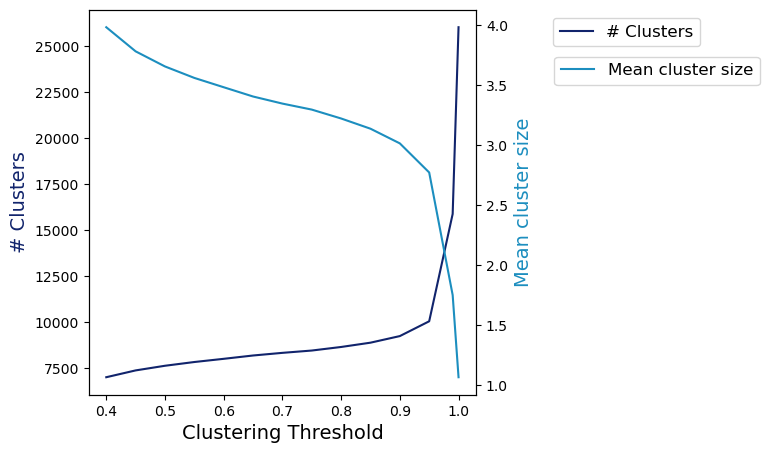

In [3]:
thresholds = [.4, .45, .50, .55, .60, .65, .70, .75, .80, .85, .90, .95, .99, 1.00]
clusterstats = get_cluster_statistics(thresholds)
plot_clusterstatistics(clusterstats)